In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('weight-height.csv') 

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.shape

(10000, 3)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
df['Height'].describe()


count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

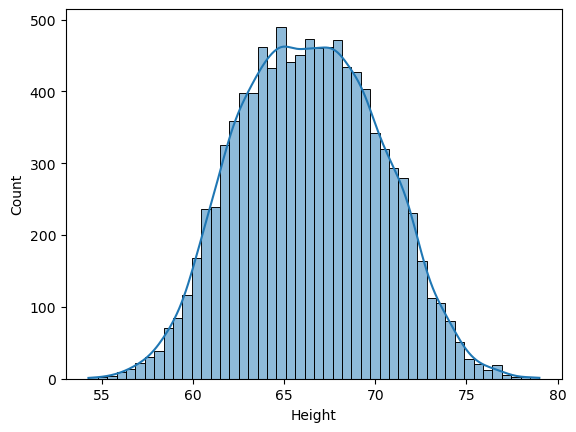

In [13]:
import seaborn as sns 
sns.histplot(df['Height'],kde =True)

<Axes: xlabel='Height', ylabel='Density'>

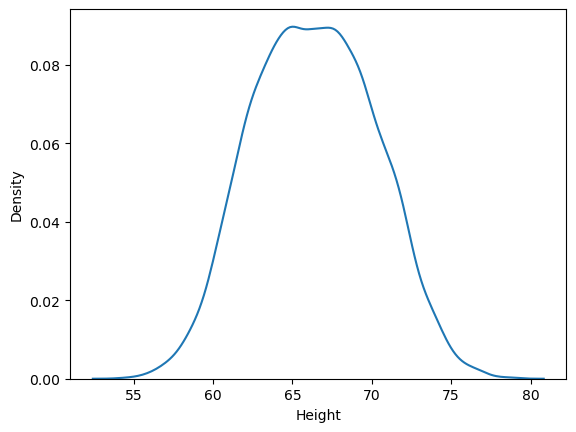

In [14]:
sns.kdeplot(df['Height'])

<Axes: >

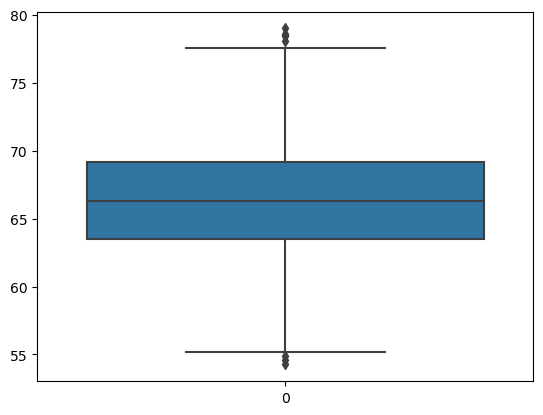

In [15]:
sns.boxplot(df['Height'])

In [16]:
upper_limit = df['Height'].quantile(0.99)
lower_limit = df['Height'].quantile(0.01)

In [17]:
upper_limit

74.7857900583366

In [18]:
lower_limit

58.13441158671655

In [19]:
new_df  = df[(df['Height'] <= upper_limit) &(df['Height']>= lower_limit) ]

In [20]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [21]:
new_df['Height'].describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

<Axes: xlabel='Height', ylabel='Density'>

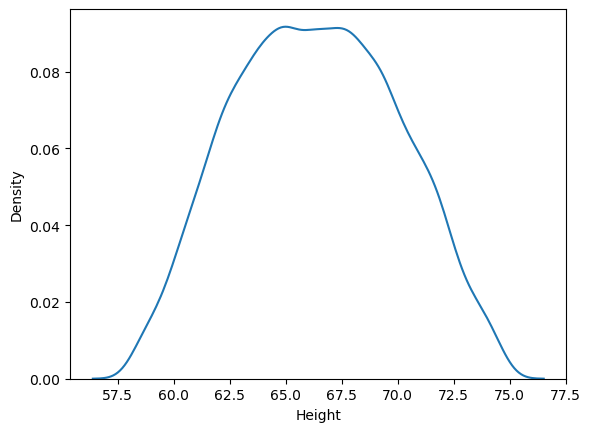

In [23]:
sns.kdeplot(new_df['Height'])

<Axes: >

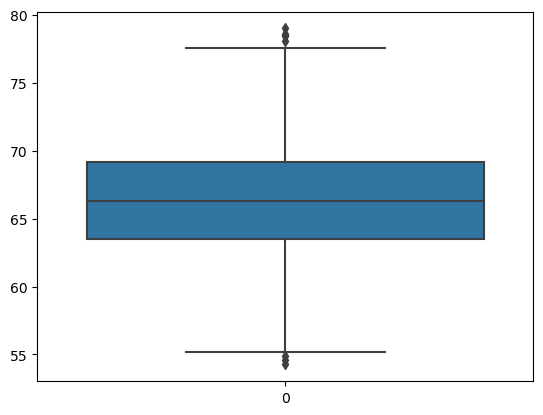

In [24]:
sns.boxplot(df['Height'])

In [26]:
# Capping
df['Height'] = np.where(
    df['Height']>= upper_limit,upper_limit,
    np.where(df['Height']<=lower_limit,lower_limit,
            df['Height'])
)

In [27]:
df['Height']

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: Height, Length: 10000, dtype: float64

<Axes: xlabel='Height', ylabel='Count'>

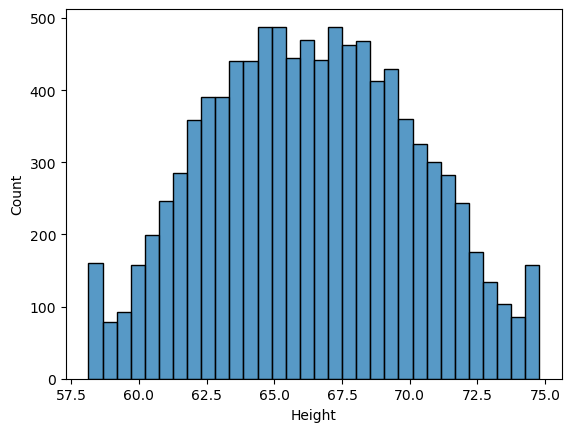

In [28]:
sns.histplot(df['Height'])

<Axes: >

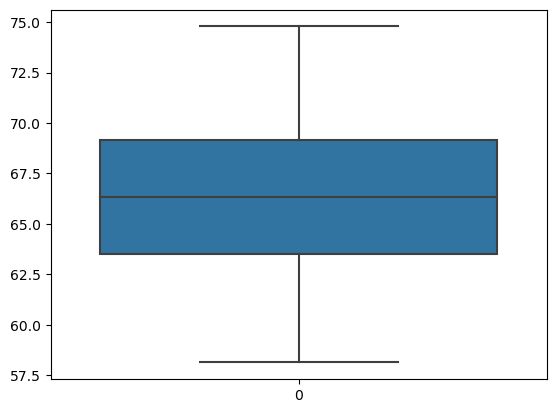

In [29]:
sns.boxplot(df['Height'])